In [63]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager


api = "key"
secret = "secret"

client = Client(api, secret)

In [64]:
spot_btc_usdt = client.futures_ticker(symbol='OPUSDT')['lastPrice']
spot_btc_usdt

'1.4111000'

In [65]:
import f

delta = f.time_delta_hours(5)
klines = client.futures_historical_klines('1000PEPEUSDT', Client.KLINE_INTERVAL_1MINUTE, delta[0], delta[1])

Delta: 01 Jun 2023 06:27:36 Now: 01 Jun 2023 11:27:36


In [66]:
import pandas as pd
import pandas_ta as ta

df = pd.DataFrame(klines, columns=['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
df['Datetime'] = pd.to_datetime(df['Datetime'], unit='ms')
df.set_index('Datetime', inplace=True)
df = df.astype(float)
df


,Open,High,Low,Close,Volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
Datetime,,,,,,,,,,,
2023-06-01 06:28:00,0.001231,0.001232,0.001231,0.001232,9.522461e+07,1.685601e+12,1.172745e+05,267.0,52789813.0,65013.821515,0.0
2023-06-01 06:29:00,0.001232,0.001233,0.001230,0.001233,1.509166e+08,1.685601e+12,1.858440e+05,448.0,68178555.0,83974.713322,0.0
2023-06-01 06:30:00,0.001233,0.001233,0.001231,0.001233,1.237394e+08,1.685601e+12,1.523920e+05,321.0,54046137.0,66548.609342,0.0
2023-06-01 06:31:00,0.001233,0.001234,0.001233,0.001233,6.479665e+07,1.685601e+12,7.990895e+04,257.0,34004914.0,41937.719898,0.0
2023-06-01 06:32:00,0.001233,0.001234,0.001233,0.001234,3.843769e+07,1.685601e+12,4.739980e+04,148.0,18910155.0,23319.221931,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01 11:23:00,0.001301,0.001307,0.001299,0.001304,8.880726e+08,1.685619e+12,1.155933e+06,2596.0,431527823.0,561979.407807,0.0
2023-06-01 11:24:00,0.001304,0.001305,0.001301,0.001303,3.637094e+08,1.685619e+12,4.739858e+05,1303.0,237252308.0,309207.059639,0.0
2023-06-01 11:25:00,0.001303,0.001304,0.001295,0.001298,1.182009e+09,1.685619e+12,1.533799e+06,3269.0,497222209.0,645150.701478,0.0


In [67]:
df.ta.adjusted = True
df.ta.datetime = "Datetime"
df.ta.volume = "Volume"
df.ta.high = "High"
df.ta.low = "Low"
df.ta.close = "Close"
df.ta.ema(length=100, append=True)
df.ta.macd(append=True)
df['ATR']=ta.atr(df['High'], df['Low'], df['Close'], length=5)
df

,Open,High,Low,Close,Volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,EMA_100,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ATR
Datetime,,,,,,,,,,,,,,,,
2023-06-01 06:28:00,0.001231,0.001232,0.001231,0.001232,9.522461e+07,1.685601e+12,1.172745e+05,267.0,52789813.0,65013.821515,0.0,NaN,NaN,NaN,NaN,NaN
2023-06-01 06:29:00,0.001232,0.001233,0.001230,0.001233,1.509166e+08,1.685601e+12,1.858440e+05,448.0,68178555.0,83974.713322,0.0,NaN,NaN,NaN,NaN,NaN
2023-06-01 06:30:00,0.001233,0.001233,0.001231,0.001233,1.237394e+08,1.685601e+12,1.523920e+05,321.0,54046137.0,66548.609342,0.0,NaN,NaN,NaN,NaN,NaN
2023-06-01 06:31:00,0.001233,0.001234,0.001233,0.001233,6.479665e+07,1.685601e+12,7.990895e+04,257.0,34004914.0,41937.719898,0.0,NaN,NaN,NaN,NaN,NaN
2023-06-01 06:32:00,0.001233,0.001234,0.001233,0.001234,3.843769e+07,1.685601e+12,4.739980e+04,148.0,18910155.0,23319.221931,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01 11:23:00,0.001301,0.001307,0.001299,0.001304,8.880726e+08,1.685619e+12,1.155933e+06,2596.0,431527823.0,561979.407807,0.0,0.001281,3.612178e-06,-0.000003,0.000007,0.000005
2023-06-01 11:24:00,0.001304,0.001305,0.001301,0.001303,3.637094e+08,1.685619e+12,4.739858e+05,1303.0,237252308.0,309207.059639,0.0,0.001281,3.036151e-06,-0.000003,0.000006,0.000005
2023-06-01 11:25:00,0.001303,0.001304,0.001295,0.001298,1.182009e+09,1.685619e+12,1.533799e+06,3269.0,497222209.0,645150.701478,0.0,0.001281,2.175320e-06,-0.000003,0.000005,0.000006


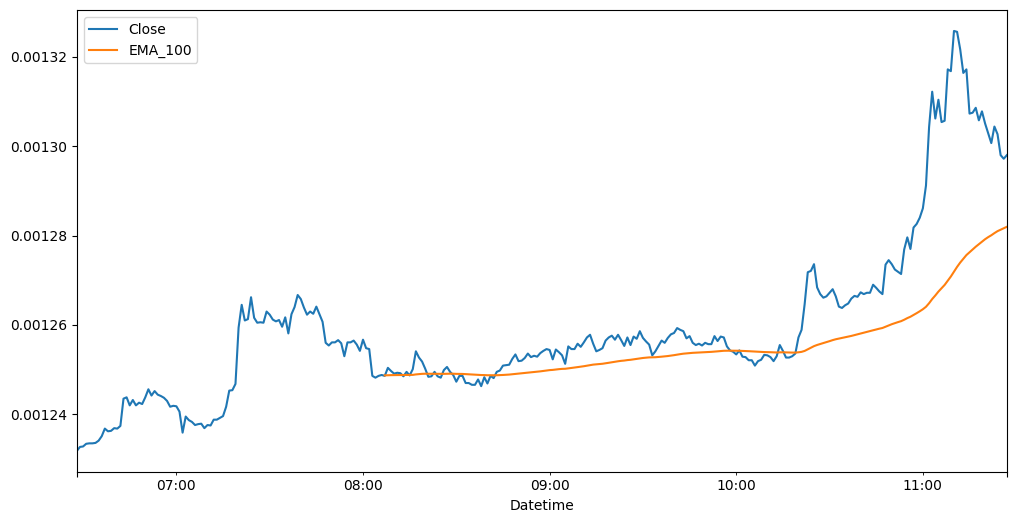

In [68]:
import matplotlib.pyplot as plt
df[['Close', 'EMA_100']].plot(figsize=(12, 6))
plt.show()

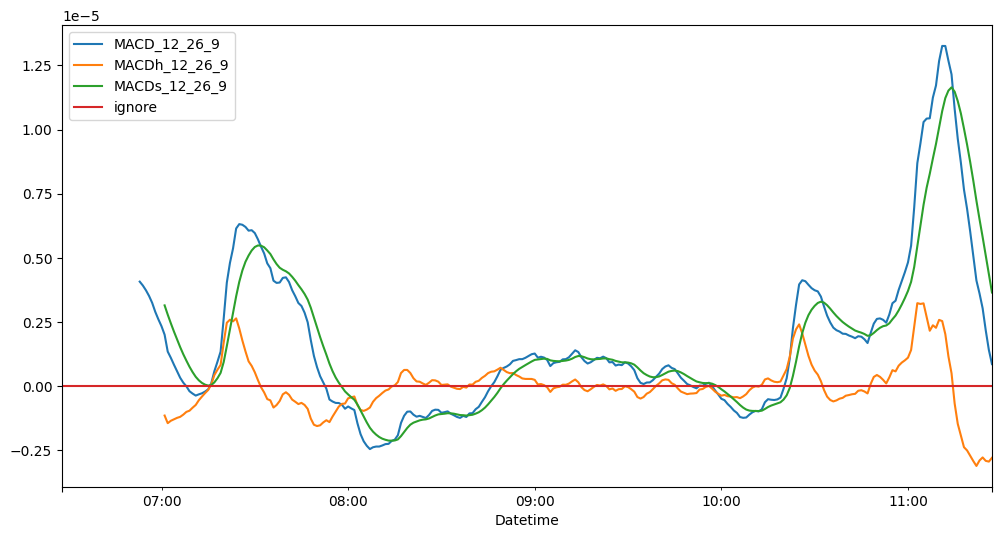

In [69]:
df[['MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ignore']].plot(figsize=(12, 6))
plt.show()

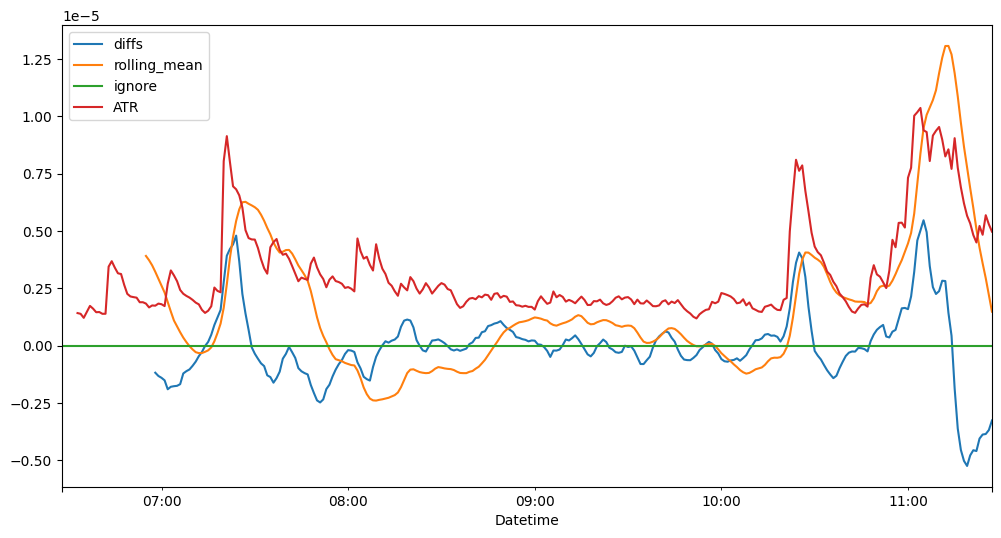

In [70]:
df['diffs'] = df['MACD_12_26_9'].diff(5)
df['rolling_mean'] = df['MACD_12_26_9'].rolling(window=3).mean()

df[['diffs', 'rolling_mean', 'ignore', "ATR"]].plot(figsize=(12, 6))

plt.show()

In [71]:
class PairInstrument:
    def __init__(self):
        self.fut_price_now = 0
        self.btc = 0
        self.old_eth = 0
        self.old_btc = 0
        self.deviation = 0
        self.percent_d = 0
        self.timer = 0
        self.expected_ratio = 6751/616
        self.real_ratio = 6751/616
        self.ratio_of_ratio = 0
        self.calc_f_trigger = False
        self.delta_eth = 0
        self.delta_btc = 0
        self.change_price_percent = 0

pair = PairInstrument()

In [72]:
#import time
#while True:
#    pair.fut_price_now = round(float((client.futures_ticker(symbol='ETHUSDT'))['lastPrice']), 2)
#    print(pair.fut_price_now)
#    time.sleep(1)

In [73]:
def ATR_f():
    return df['ATR'].to_numpy()

def EMA_100_f():
    return df['EMA_100'].to_numpy()

def MACD_big_f():
    return df['MACDh_12_26_9'].to_numpy()

def MACD_low_f():
    return df['MACDs_12_26_9'].to_numpy()

def MACD_f():
    return df['MACD_12_26_9'].to_numpy()

df[['MACD_12_26_9', 'MACDs_12_26_9','MACDs_12_26_9']]

,MACD_12_26_9,MACDs_12_26_9,MACDs_12_26_9
Datetime,,,
2023-06-01 06:28:00,NaN,NaN,NaN
2023-06-01 06:29:00,NaN,NaN,NaN
2023-06-01 06:30:00,NaN,NaN,NaN
2023-06-01 06:31:00,NaN,NaN,NaN
2023-06-01 06:32:00,NaN,NaN,NaN
...,...,...,...
2023-06-01 11:23:00,3.612178e-06,0.000007,0.000007
2023-06-01 11:24:00,3.036151e-06,0.000006,0.000006
2023-06-01 11:25:00,2.175320e-06,0.000005,0.000005


In [77]:
def accept_long(macd, price, ema):
    if macd[-1] > macd[-2] and macd[-2] > macd[-3] and macd[-3] < macd[-4]:# and price[-1] > ema[-1]:
        return True
    else:
        return False
    
def accept_short(macd, price, ema):
    if macd[-1] < macd[-2] and macd[-2] < macd[-3] and macd[-3] > macd[-4]:# and price[-1] < ema[-1]:
        return True
    else:
        return False

def tp_accept_long(macd, price, ema):
    if macd[-1] > macd[-2] and macd[-2] > macd[-3] and macd[-3] > macd[-4] and macd[-4] < macd[-5]:# and price[-1] > ema[-1]:
        return True
    else:
        return False
    

def tp_accept_short(macd, price, ema):
    if macd[-1] < macd[-2] and macd[-2] < macd[-3] and macd[-3] < macd[-4] and macd[-4] > macd[-5]:# and price[-1] < ema[-1]:
        return True
    else:
        return False


In [98]:
import numpy as np
from backtesting import Strategy
from backtesting import Backtest

from backtesting.backtesting import Order
from backtesting.lib import cross, crossover

a = Order

b = Order

class MyStrat(Strategy):
    order = Order
    def init(self):
        self.atr1 = self.I(ATR_f)
        self.ema1 = self.I(EMA_100_f)
        self.macd1_b = self.I(MACD_big_f)
        self.macd1_l = self.I(MACD_low_f)
        self.macd1 = self.I(lambda: df[['MACD_12_26_9', 'MACDh_12_26_9','MACDs_12_26_9']], name='MACD')


    def next(self):
        slatr = 1.1 * self.atr1[-1]
        TPSLRatio = 7

        if accept_long(self.macd1[0], self.data.Close, self.ema1) and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr*TPSLRatio
            if not np.isnan(sl1) and not np.isnan(tp1):
                print("b")
                global b
                b = self.buy(sl=sl1, tp=tp1)

        #if tp_accept_short(self.macd1[0], self.data.Close, self.ema1) and len(self.trades)>=1:
        #    print("b not stop")
        #    self.position.close()
        
        if accept_short(self.macd1[0], self.data.Close, self.ema1) and len(self.trades)==0: 
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            if not np.isnan(sl1) and not np.isnan(tp1):
                print("s")
                global a
                a = self.sell(sl=sl1, tp=tp1)

        #if tp_accept_long(self.macd1[0], self.data.Close, self.ema1) and len(self.trades)>=1:
        #    print("s not stop")
        #    self.position.close()
            

bt = Backtest(df, MyStrat, cash=1000000, commission=.00, exclusive_orders=False)
stat = bt.run()
stat
bt.plot()


b
b
s


C:\Users\щдуп\AppData\Roaming\Python\Python311\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\щдуп\AppData\Roaming\Python\Python311\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


GridPlot(id='p70723', ...)